In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler



def compute_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))


class KNN_Classifier:

    def __init__(self, k=1):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self.predict_label(x) for x in X]
        return np.array(y_pred)

    def predict_label(self, x):
        distances = [compute_distance(x, x_train) for x_train in self.X_train]# calculating distance from one datapoint to all samples
        k_index = np.argsort(distances)[:self.k]# Sorting and returning indices of the first k neighbors
        # getting the labels
        k_labels = [self.y_train[i] for i in k_index]  
        # returning the most common labels
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

# MULTI CLASS CLASSIFICATION WITH HIGH DIMENSIONS (784)

In [2]:

#using the MNIST DATASET

train = pd.read_csv("C://Users//vivek//Desktop//bigdata//MAchine learning//mnist_train.csv", header = None)
test = pd.read_csv("C://Users//vivek//Desktop//bigdata//MAchine learning//mnist_test.csv", header = None)

y_tr = train[0]
x_tr = train.drop([0], axis =1)
x_tr.shape 
x = np.array(x_tr.iloc[:,:])
y = np.array(y_tr)
y=y.astype('int')

y_te = test[0]
x_te = test.drop([0], axis =1)
x_test = np.array(x_te.iloc[:,:])
y_test = np.array(y_te)

#------x, y are the train datasets x_test and y_test are the test datasets 


In [3]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy = []

# selecting the best K

for i in range(1,10):
    Knn = KNN_Classifier(k=i)
    Knn.fit(x,y)
    predictions = Knn.predict(x_test)


    acc = accuracy_score(y_test ,predictions)
    accuracy.append(acc)
    
print(accuracy)

[0.928, 0.928, 0.926, 0.926, 0.93, 0.934, 0.928, 0.928, 0.932]


# MULTI CLASS CLASSIFICATION WITH REDUCED DIMENSIONS (120)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=120)
principalComponents = pca.fit_transform(x)
principalComponents_test = pca.transform(x_test)


In [5]:

reduced_dimension_accuracy = []
# selecting the best K

for i in range(1,10):
    Knn = KNN_Classifier(k=i)
    Knn.fit(principalComponents,y)
    predictions1 = Knn.predict(principalComponents_test)


    acc1 = accuracy_score(y_test ,predictions1)
    reduced_dimension_accuracy.append(acc1)
    
print(reduced_dimension_accuracy)

[0.937, 0.937, 0.931, 0.935, 0.941, 0.931, 0.933, 0.932, 0.934]


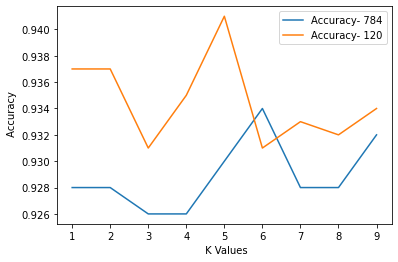

In [6]:
l1=[1,2,3,4,5,6,7,8,9]
plt.plot(l1,accuracy,label='Accuracy- 784')
plt.plot(l1,reduced_dimension_accuracy,label='Accuracy- 120')

plt.legend()
plt.xlabel(" K Values")
plt.ylabel(" Accuracy")

plt.show()

# BINARY CLASSIFICATION

In [7]:
#using the BREAST CANCER DATASET

train = pd.read_csv("C://Users//vivek//Desktop//bigdata//wdbc_data.csv", header = None)
y_tr = train[1]
x_tr = train.drop([0,1], axis =1)
x_tr.shape 
x_tr1 = np.array(x_tr.iloc[:,:])
y_tr1 = np.array(y_tr)
y_tr1[y_tr1 == 'B'] = 1 
y_tr1[y_tr1 == 'M'] = -1 
y_tr1=y_tr1.astype('int')
    
    
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train,Y_test = train_test_split(x_tr1,y_tr1,test_size=0.2 )

In [8]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [9]:
Binary_accuracy = []
# selecting the best K

for i in range(1,15):
    Knn = KNN_Classifier(k=i)
    Knn.fit(X_train,Y_train)
    predictions2 = Knn.predict(X_test)


    acc2 = accuracy_score(Y_test ,predictions2)
    Binary_accuracy.append(acc2)
    
print(Binary_accuracy)

[0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088]


In [10]:
print(max(Binary_accuracy))

0.9385964912280702


# IMPACT OF STANDARDIZATION & NORMALIZATION

In [11]:

scaler = StandardScaler()
scaler.fit(X_train )
X_train1= scaler.transform(X_train)

scaler.fit(X_test )
X_test1= scaler.transform(X_test)


In [12]:
Binary_accuracy2 = []
# selecting the best K

for i in range(1,15):
    Knn = KNN_Classifier(k=i)
    Knn.fit(X_train1,Y_train)
    predictions3 = Knn.predict(X_test1)


    acc3 = accuracy_score(Y_test ,predictions3)
    Binary_accuracy2.append(acc3)
    
print(Binary_accuracy2)

[0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771]


In [13]:
print(max(Binary_accuracy2))

0.9824561403508771


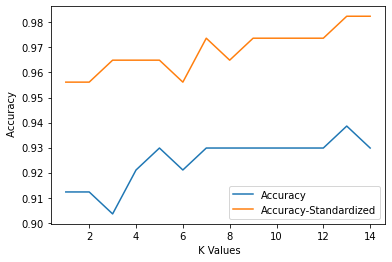

In [21]:
l2=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.plot(l2,Binary_accuracy,label='Accuracy')
plt.plot(l2,Binary_accuracy2,label='Accuracy-Standardized')

plt.legend()
plt.xlabel(" K Values")
plt.ylabel(" Accuracy")

plt.show()

# USING AN IMBALANCED DATASET

In [18]:
#using the BREAST CANCER DATASET

train_IB = pd.read_csv("C://Users//vivek//Desktop//bigdata//MAchine learning//wdbc_IB.csv", header = None)
y_tr_IB = train_IB[1]
x_tr_IB = train_IB.drop([0,1], axis =1)
x_tr_IB.shape 
x_tr1_IB = np.array(x_tr_IB.iloc[:,:])
y_tr1_IB = np.array(y_tr_IB)
y_tr1_IB[y_tr1_IB == 'B'] = 1 
y_tr1_IB[y_tr1_IB == 'M'] = -1 
y_tr1_IB=y_tr1_IB.astype('int')
    
    
from sklearn.model_selection import train_test_split

X_train_IB, X_test_IB,Y_train_IB,Y_test_IB = train_test_split(x_tr1_IB,y_tr1_IB,test_size=0.2 )

In [19]:
Binary_accuracy_IB = []
# selecting the best K

#scaler.fit(X_train )
#X_train_IB= scaler.transform(X_train_IB)

#scaler.fit(X_test_IB )
#X_test_IB= scaler.transform(X_test_IB)


for i in range(1,15):
    Knn = KNN_Classifier(k=i)
    Knn.fit(X_train_IB,Y_train_IB)
    predictions5 = Knn.predict(X_test_IB)


    acc5 = accuracy_score(Y_test_IB ,predictions5)
    Binary_accuracy_IB.append(acc5)
    
print(Binary_accuracy_IB)

[0.9878048780487805, 0.9878048780487805, 0.9878048780487805, 0.9878048780487805, 0.9878048780487805, 0.9878048780487805, 0.9878048780487805, 0.9878048780487805, 0.9634146341463414, 0.9634146341463414, 0.9634146341463414, 0.975609756097561, 0.9512195121951219, 0.9634146341463414]


In [20]:
print(max(Binary_accuracy_IB))

0.9878048780487805
